In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing data set
x = pd.read_csv("Diabetes_XTrain.csv").values
y = pd.read_csv("Diabetes_YTrain.csv").values
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y, test_size = 0.2, random_state = 7)
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)

(460, 8) (116, 8)
(460, 1) (116, 1)


In [4]:
def distance(a,k):
    dist = np.sqrt(np.sum((x_train-a)**2, axis = 1))[np.newaxis].T # vector of all the distances from point a to all the points in dataset
    new_mat = np.hstack([dist,y_train]) # stacking labels with distance vector to access corresponding labels
    sortedArr = new_mat[new_mat[:,0].argsort()]
    knn = sortedArr[0:k,:]
    return knn

In [5]:
def prediction(a,k):
    c =None
    dist = distance(a,k)
    one = (dist==1).sum()
    zero = (dist==0).sum()
    if one > zero:
        c = 1
    elif zero > one:
        c = 0
    return c

In [6]:
# Function to check accuracy of knn
def accuracy (k):
    n = 0
    for i in range(x_test.shape[0]):
        l = i*100/x_test.shape[0]
        ex = x_test[i,:]
        p = prediction(ex,k)
        if p == y_test[i]:
            n += 1
    return n/(i+1)

In [7]:
# Validating the value of k
k_value = []
score =[]
for k in range (1,16):
    k_value.append(k)
    score.append(accuracy(k))
    
print(score)
print(k_value)

[0.6637931034482759, 0.4396551724137931, 0.6982758620689655, 0.6206896551724138, 0.7327586206896551, 0.646551724137931, 0.75, 0.6551724137931034, 0.7327586206896551, 0.6551724137931034, 0.75, 0.6551724137931034, 0.7586206896551724, 0.6982758620689655, 0.75]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


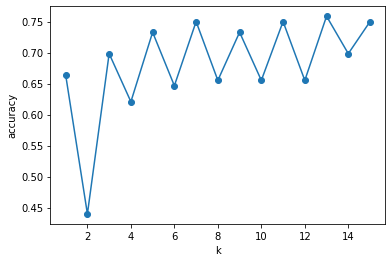

In [8]:
# Validating the value of k - plotting graph
plt.plot(k_value,score, marker= "o")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()